## First CNN model - TensorFlow

### Load dataset

In [0]:

import h5py
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from cnn_utils import *


def load_dataset():
    dataset1 = h5py.File('c:/train_.hdf5', "r")
    #leer los elementos del dataset
    d_e = np.array(dataset1['train_'][:])

    dataset1.close()
    
    dataset2 = h5py.File('c:/data_set_Y.hdf5', "r")
    #leer los elementos del dataset
    p = np.array(dataset2['labels_unicos'][:])
    
    #l_e=p[:500].reshape(500,1)
    
    j=p[:900].reshape(900,1).astype(int)
    #print(p[:500].shape)
    #print(type(j))

    k=np.eye(2,dtype=int)[j.reshape(-1)].T
    l_e=np.array(k[0,:].reshape(900,1))
    
    
    data_evaluacion=d_e[:,901:1171]# datos de evaluacion x
    data_y_eva=p[901:1171].reshape(270,1).astype(int)
    
    data_y_=np.eye(2,dtype=int)[data_y_eva.reshape(-1)].T
    data_y=np.array(data_y_[0,:].reshape(270,1))
   
    
    print('EL SHAPE DEL DATASET x  ES {}:'.format(d_e[:,:900].shape))
    print('EL SHAPE DEL DATASET y  ES {}:'.format(l_e.shape))
    print('-------------------------------------------------------')
    print('EL SHAPE DEL DATASET x EVALUACION  ES {}:'.format(data_evaluacion.shape))
    print('EL SHAPE DEL DATASET y EVALUACION  ES {}:'.format(data_y_eva.shape))
    dataset2.close()
    
    
    return(d_e[:,:900],l_e,data_evaluacion,data_y)

In [0]:
X_train_orig,Y_train_orig,data_evaluacion,data_y_eva = load_dataset()



EL SHAPE DEL DATASET x  ES (65536, 900):
EL SHAPE DEL DATASET y  ES (900, 1):
-------------------------------------------------------
EL SHAPE DEL DATASET x EVALUACION  ES (65536, 270):
EL SHAPE DEL DATASET y EVALUACION  ES (270, 1):


In [0]:
uno=np.array([])
cero=np.array([])
for e in Y_train_orig:
    if e ==1:
        
        uno=np.append(uno,e)
    elif e==0:
        
        cero=np.append(cero,e)
print(uno.shape)
print(cero.shape)


(611,)
(289,)


In [0]:
print(X_train_orig.T.shape)

(900, 65536)


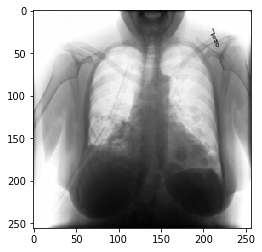

In [0]:
#Visulize one Image with Label
plt.imshow(X_train_orig[:,0].T.reshape(256,256), cmap='Greys')
plt.show()


In [0]:
#Normalize Dataset (X_train/X_train.max())
data_x_eva_=data_evaluacion/255
data_x_eva=data_x_eva_.T
X_train_norm = X_train_orig / X_train_orig.max()
X_train_norm = X_train_norm.T

In [0]:
#convert to one_hot_encoded
y_train_aux = convert_to_one_hot(Y_train_orig, 2).T.astype(int)
data_y_eva = convert_to_one_hot(data_y_eva, 2).T.astype(int)


(270, 65536)
(900, 65536)


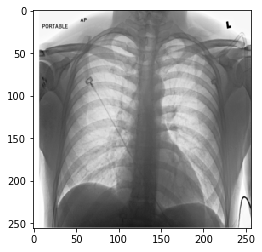

In [0]:
'''print(data_y_eva)
print(y_train_aux)'''
print(data_x_eva.shape)
print(X_train_norm.shape)
plt.imshow(data_evaluacion[:,0].T.reshape(256,256), cmap='Greys')
plt.show()


In [0]:
#print Shape of the data
print("Number of training examples: " +  str(X_train_norm.shape[0]))
print("X_train_norm shape: " + str(X_train_norm.shape))
print("Y_train_aux shape: " + str(y_train_aux.shape))


Number of training examples: 900
X_train_norm shape: (900, 65536)
Y_train_aux shape: (900, 2)


In [0]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train_norm, y_train_aux, test_size=0.3, random_state=42)

print('SHAPE DE X_train ES:{}'.format(X_train.shape))
print('SHAPE DE X_test  ES:{}'.format(X_test.shape))
print('SHAPE DE y_train ES:{}'.format(y_train.shape))
print('SHAPE DE y_test ES:{}'.format(y_test.shape))



SHAPE DE X_train ES:(630, 65536)
SHAPE DE X_test  ES:(270, 65536)
SHAPE DE y_train ES:(630, 2)
SHAPE DE y_test ES:(270, 2)


## veamos como determinar la forma de W y B

$\mathbf{Y}=\sigma(\mathbf{X}\cdot\mathbf{W} + \mathbf{B})$

$ 
\begin{pmatrix}
    y_1 \\ y_2 \\ \vdots \\ y_{10}
\end{pmatrix}=\sigma\left[
\begin{pmatrix}
    x_1 & x_2 & \dots & x_{784}
\end{pmatrix}
\begin{pmatrix}
    w_{1, 1} & w_{1, 2}  & \dots  & w_{1, 10} \\
    w_{2, 1} & w_{2, 2}  & \dots  & w_{2, 10} \\
    \vdots &  \vdots & \ddots & \vdots \\
    w_{784, 1} & w_{784, 2}  & \dots  & w_{784, 10}
\end{pmatrix} +
\begin{pmatrix}
    b_1 \\ b_2 \\ \vdots \\ b_{10}
\end{pmatrix}
\right]
$

#### Weights (pesos) inicializados con una distribucion normal y una desviacion estandar de 0.1

#### Bias inicializado en 0.1

In [0]:
      # Create helper functions 
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    
    return tf.Variable(init_random_dist)

def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME',name='conv_')

def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],strides=[1, 2, 2, 1], padding='SAME')

def max_pool_4by4(x):
    return tf.nn.max_pool(x, ksize=[1, 4, 4, 1],strides=[1, 4, 4, 1], padding='SAME')

def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b



In [0]:
# Define the placeholder
x = tf.placeholder(tf.float32,shape=[None,65536])
y_true = tf.placeholder(tf.float32,shape=[None,2])

In [0]:
# Define Layers

In [0]:
x_image = tf.reshape(x,[-1,256,256,1])

convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_4by4(convo_1)

convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_4by4(convo_2)

convo_2_flat = tf.reshape(convo_2_pooling,[-1,16*16*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,64))

hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)
y_pred = normal_full_layer(full_one_dropout,2)

In [0]:
# Define Loss function and Optimizer
learning_rate = 0.0001

In [0]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y_pred))
#tf.summary.scalar('cross_entropy', cross_entropy)



In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cross_entropy)
#train = optimizer.minimize(cross_entropy)

In [0]:
# Initialize Variables 

In [0]:
init = tf.global_variables_initializer()

In [0]:
# Create session and train the model

In [0]:
def random_mini_batches_v2(X, Y, mini_batch_size = 32, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples) (m, Hi, Wi, Ci)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples) (m, n_y)
    mini_batch_size - size of the mini-batches, integer
    seed -- this is only for the purpose of grading, so that you're "random minibatches are the same as ours.
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    np.random.seed(seed)
    
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))

    shuffled_X = X[:,permutation]
    shuffled_Y = Y[:,permutation].reshape((Y.shape[0],m))

    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch_Y = shuffled_Y[:,k * mini_batch_size : k * mini_batch_size + mini_batch_size]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch_Y = shuffled_Y[:,num_complete_minibatches * mini_batch_size : m]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

            

-------------------------------------------------------
Train Accuracy: 0.6031746 ------ Test Accuracy: 0.51111114
Cost after epoch 0: 1.378310
---------------------------------------------------
Train Accuracy: 0.7619048 ------ Test Accuracy: 0.7111111
Cost after epoch 10: 0.515681
---------------------------------------------------
Train Accuracy: 0.83809525 ------ Test Accuracy: 0.7592593
Cost after epoch 20: 0.451888
---------------------------------------------------
Train Accuracy: 0.8365079 ------ Test Accuracy: 0.74444443
Cost after epoch 30: 0.423964
---------------------------------------------------
Train Accuracy: 0.8793651 ------ Test Accuracy: 0.7962963
Cost after epoch 40: 0.374908
---------------------------------------------------
Train Accuracy: 0.8492063 ------ Test Accuracy: 0.77037036
Cost after epoch 50: 0.338511
---------------------------------------------------
Train Accuracy: 0.8968254 ------ Test Accuracy: 0.7814815
Cost after epoch 60: 0.289391
-------------

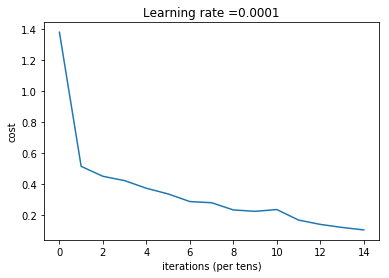

Train Accuracy: 0.96984124
Test Accuracy: 0.73703706
Evaluacion Accuracy: 0.7407407


In [0]:
#tf.reset_default_graph() # to be able to rerun the model without overwriting tf variables

print_cost = True
seed = 10
minibatch_size = 32 #size of a minibatch
num_epochs = 150 #number of epochs of the optimization loop
m = X_train.shape[0] 
costs = [] # To keep track of the cost

predictions = []
trueLabel = []

predictions_eva = []
trueLabel_eva = []

pres=np.array([])

#saver = tf.train.Saver()

with tf.Session() as sess:
    #write = tf.summary.FileWriter('c:/grafo_neumonia_A',sess.graph)
    print('-------------------------------------------------------')
    
    # Run the initialization
    sess.run(init)
    
    
     # Do the training loop
    for epoch in range(num_epochs):

        
        epoch_cost = 0. # Defines a cost related to an epoch
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        seed = seed + 1
    
        #Needs to be transpose because the function returns ((input size, number of examples))
        minibatches = random_mini_batches_v2(X_train.T, y_train.T, minibatch_size , seed)
    
        #print('num minibatches to train: {}'.format(num_minibatches))
        
        
        for minibatch in minibatches:
            
            
           
            
            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch
            
       
            #Needs to be transpose because the function returns ((input size, number of examples)) and we need to feed (number of examples,input size)
            _ , minibatch_cost = sess.run([optimizer,cross_entropy],feed_dict={x:minibatch_X.T,y_true:minibatch_Y.T,hold_prob:0.5})
            
            epoch_cost += minibatch_cost / num_minibatches 
            
            
            
            
            
            
            

              
        # Print the cost every epoch
        if print_cost == True and epoch % 10 == 0:
            correct_prediction_ = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
            accuracy = tf.reduce_mean(tf.cast(correct_prediction_, tf.float32))
            print ("Train Accuracy:", accuracy.eval({x: X_train, y_true: y_train, hold_prob:0.5}),"------ Test Accuracy:", accuracy.eval({x: X_test, y_true: y_test,hold_prob:0.5}))
        
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            print('---------------------------------------------------')
        if print_cost == True and epoch % 10 == 0:
            costs.append(epoch_cost)
            
        correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        pres=np.append(pres,accuracy.eval({x: X_test, y_true: y_test,hold_prob:0.5}))
       
        
    #saver.save(sess,'.\my_test_model')    
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    
    # Calculate the correct predictions
    correct_prediction = tf.equal(tf.argmax(y_pred,1), tf.argmax(y_true,1))
    
    
    #predicion con test--------------------------------------------------------------------
    predictions = tf.argmax(y_pred,1).eval({x:X_test,hold_prob:0.5})
    
    
    trueLabel = tf.argmax(y_true,1).eval({x:X_test, y_true: y_test})
    
    #predicion con evaluacion--------------------------------------------------------------
    predictions_eva = tf.argmax(y_pred,1).eval({x:data_x_eva,hold_prob:0.5})
    
    
    trueLabel_eva = tf.argmax(y_true,1).eval({x:data_x_eva, y_true: data_y_eva})
    #---------------------------------------------------------------------------------------
    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    
    
   
    
    #Fix Accuracy
    print ("Train Accuracy:", accuracy.eval({x: X_train, y_true: y_train, hold_prob:0.5}))
    print ("Test Accuracy:", accuracy.eval({x: X_test, y_true: y_test,hold_prob:0.5})) 
    print ("Evaluacion Accuracy:", accuracy.eval({x: data_x_eva, y_true: data_y_eva,hold_prob:0.5}))
    
    
    #first_summary=tf.summary.scalar('accuracy', accuracy)
   
   

In [0]:

#session = tf.Session()
#saver.restore(sess=session, save_path='.\my_test_model')



In [0]:
write = tf.summary.FileWriter('c:/grafo_neumonia_',sess.graph)
print('guardados los grafos')
write.close()

guardados los grafos


In [0]:
#write=tf.placeholder(tf.float32,shape='none',name ="write")

#C:\> tensorboard --logdir="grafo_neumonia/grafo_neumonia"----- para ejecutar tensorboard -- EN https://VM2019:6006

In [0]:
#!pip install --upgrade tensorflow-gpu==1.8.0 --user

In [0]:
#!pip install --upgrade pip --user

### Evaluation Metrics

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, auc,roc_curve,accuracy_score,roc_auc_score,zero_one_loss

In [0]:
y_predicted = predictions
y_label = trueLabel

y_predicted_eva = predictions_eva
y_label_eva = trueLabel_eva

In [0]:
print('--REPORTE DE CLASIFICACION SET DE DATOS DE TEST---------')
print(classification_report(y_label, y_predicted))
print('--------------------------------------------------------')
print('--REPORTE DE CLASIFICACION SET DE DATOS DE EVALUACION---')


print(classification_report(y_label_eva, y_predicted_eva))

--REPORTE DE CLASIFICACION SET DE DATOS DE TEST---------
             precision    recall  f1-score   support

          0       0.66      0.53      0.59        90
          1       0.79      0.86      0.82       180

avg / total       0.74      0.75      0.74       270

--------------------------------------------------------
--REPORTE DE CLASIFICACION SET DE DATOS DE EVALUACION---
             precision    recall  f1-score   support

          0       0.55      0.50      0.52        80
          1       0.80      0.83      0.81       190

avg / total       0.72      0.73      0.73       270



In [0]:
# Plot confusion_Matrix Function


### Confusion Matrix

In [0]:
print(confusion_matrix(y_label, y_predicted))
tn,fp,fn,tp = confusion_matrix(y_label, y_predicted).ravel()
print('Test')
print('TN: ',tn )
print('FN: ', fn)
print('TP: ', tp)
print('FP: ', fp)


[[ 48  42]
 [ 25 155]]
Test
TN:  48
FN:  25
TP:  155
FP:  42


In [0]:
print(confusion_matrix(y_label_eva, y_predicted_eva))
tn_,fp_,fn_,tp_ = confusion_matrix(y_label_eva, y_predicted_eva).ravel()
print('evaluacion')
print('TN: ',tn_ )
print('FN: ', fn_)
print('TP: ', tp_)
print('FP: ', fp_)

[[ 40  40]
 [ 33 157]]
evaluacion
TN:  40
FN:  33
TP:  157
FP:  40


In [0]:
# Plot confusion_Matrix Function

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('label verdadero')
    plt.xlabel('label predesido')
    


def plot_confusion_matrix_eva(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('label verdadero')
    plt.xlabel('label predesido')    

Confusion matrix, without normalization
[[ 48  42]
 [ 25 155]]


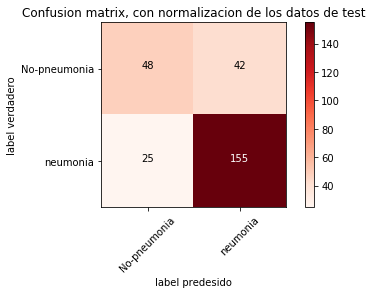

--------------------------------------------------------------------------------------------------
sensibilidad : 0.8611111111111112
precisión : 0.7868020304568528
f1: 0.8222811671087533
--------------------------------------------------------------------------------------------------


In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_label,y_predicted)
np.set_printoptions(precision=2)
class_names = ['No-pneumonia','neumonia']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, con normalizacion de los datos de test')

plt.show()
sensibilidad= tp/(tp+fn)
presicion=tp/(tp+fp)
f1=(2*presicion*sensibilidad)/(presicion+sensibilidad)
print('--------------------------------------------------------------------------------------------------')
print("sensibilidad :",sensibilidad)
print('precisión :',presicion)
print('f1:',f1)
print('--------------------------------------------------------------------------------------------------')

Confusion matrix, without normalization
[[ 40  40]
 [ 33 157]]


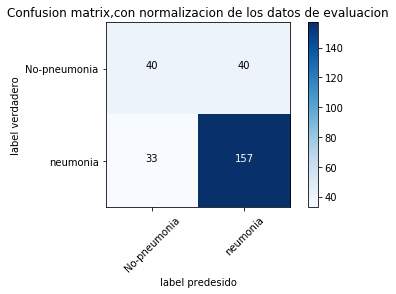

--------------------------------------------------------------------------------------------------
sensibilidad : 0.8263157894736842
precisión : 0.7969543147208121
f1: 0.8113695090439277
--------------------------------------------------------------------------------------------------


In [0]:
cnf_matrix = confusion_matrix(y_label_eva,y_predicted_eva)
np.set_printoptions(precision=2)
class_names = ['No-pneumonia','neumonia']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix_eva(cnf_matrix, classes=class_names,
                      title='Confusion matrix,con normalizacion de los datos de evaluacion')

plt.show()
sensibilidad= tp_/(tp_+fn_)
presicion=tp_/(tp_+fp_)
f1=(2*presicion*sensibilidad)/(presicion+sensibilidad)
print('--------------------------------------------------------------------------------------------------')
print("sensibilidad :",sensibilidad)
print('precisión :',presicion)
print('f1:',f1)
print('--------------------------------------------------------------------------------------------------')

# ROC AUC Score 

In [0]:
fpr, tpr, thresholds = roc_curve(y_label,y_predicted,pos_label=1)
print("FPR: ",fpr)
print("TPR: ",tpr)
print("TRESHOLDS",thresholds)
print("AUC: ",auc(fpr, tpr))
print("ROC_AUC_SCORE: ",roc_auc_score(y_label,y_predicted))

FPR:  [0.   0.47 1.  ]
TPR:  [0.   0.86 1.  ]
TRESHOLDS [2 1 0]
AUC:  0.6972222222222222
ROC_AUC_SCORE:  0.6972222222222222


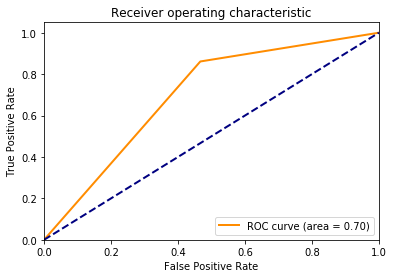

In [0]:
plt.figure()
lw = 2
plt.plot(fpr,tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()